In [11]:
library(tidyverse)
library(cowplot)
library(scales)

In [12]:
URL <- ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

processed_cleveland <- read_csv(URL) 
    colnames(processed_cleveland) <- c("Age", "Sex","Chest_Pain_Type","Resting_Blood_Pressure","Serum_Cholestrol","Fasting_Blood_Sugar", "Resting_Electrocadriographic_Results", "Maximum_Heart_Rate_Achieved","Excercise_Induced_Angina", "ST_Depression_Induced","Slope_of_Peak_Exercise_ST_Segment", "#_of_Major_Vessels", "Defects", "Diagnosis_of_Heart_Disease")
processed_cleveland

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocadriographic_Results,Maximum_Heart_Rate_Achieved,Excercise_Induced_Angina,ST_Depression_Induced,Slope_of_Peak_Exercise_ST_Segment,#_of_Major_Vessels,Defects,Diagnosis_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [13]:
cleveland_heart <- processed_cleveland |>
    select("Age", "Chest_Pain_Type","Resting_Blood_Pressure","Serum_Cholestrol","Diagnosis_of_Heart_Disease")
cleveland_heart

Age,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Diagnosis_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,4,160,286,2
67,4,120,229,1
37,3,130,250,0
41,2,130,204,0
56,2,120,236,0
62,4,140,268,3
57,4,120,354,0
63,4,130,254,2
53,4,140,203,1


In [14]:
#Diagnosis of Heart Disease is changed to a factor data type because the data can only represent a limited number of values (0,1,2,3 or 4)
cleveland_heart_recent <- cleveland_heart |>
    mutate("Diagnosis_of_Heart_Disease" = as_factor(Diagnosis_of_Heart_Disease))
cleveland_heart_recent

Age,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Diagnosis_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,4,160,286,2
67,4,120,229,1
37,3,130,250,0
41,2,130,204,0
56,2,120,236,0
62,4,140,268,3
57,4,120,354,0
63,4,130,254,2
53,4,140,203,1


In [15]:
#The mean of each group was taken just to get a sense of any visible trends
cleveland_heart_mean <- cleveland_heart_recent |>
    group_by(Age) |>
    summarize(Chest_Pain_Type = mean(Chest_Pain_Type),
             Resting_Blood_Pressure = mean(Resting_Blood_Pressure),
             Serum_Cholestrol = mean(Serum_Cholestrol))
cleveland_heart_mean

Age,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol
<dbl>,<dbl>,<dbl>,<dbl>
29,2.000000,130.0000,204.0000
34,1.500000,118.0000,196.0000
35,3.500000,126.5000,213.7500
37,3.000000,125.0000,232.5000
38,2.000000,129.0000,203.0000
39,3.250000,122.5000,239.7500
40,3.000000,134.0000,196.3333
41,2.500000,119.0000,220.7000
42,3.000000,127.0000,246.7500


In [16]:
glimpse(cleveland_heart_mean)

Rows: 41
Columns: 4
$ Age                    <dbl> 29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45,…
$ Chest_Pain_Type        <dbl> 2.000000, 1.500000, 3.500000, 3.000000, 2.00000…
$ Resting_Blood_Pressure <dbl> 130.0000, 118.0000, 126.5000, 125.0000, 129.000…
$ Serum_Cholestrol       <dbl> 204.0000, 196.0000, 213.7500, 232.5000, 203.000…


In [17]:
cleveland_heart_recent |>
    pull(Diagnosis_of_Heart_Disease) |>
    levels()

[1] "0" "1" "2" "3" "4"

## SPACEEEEE

In [18]:
cleveland_heart_bruh <- cleveland_heart |>
    filter(Diagnosis_of_Heart_Disease == "0" | 
           Diagnosis_of_Heart_Disease == "3" ) |>
mutate("Diagnosis_of_Heart_Disease" = as_factor(Diagnosis_of_Heart_Disease))     
cleveland_heart_bruh

#should now change 0 and 4 into factors because they can only be those two values

Age,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Diagnosis_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,3,130,250,0
41,2,130,204,0
56,2,120,236,0
62,4,140,268,3
57,4,120,354,0
57,4,140,192,0
56,2,140,294,0
44,2,120,263,0
52,3,172,199,0


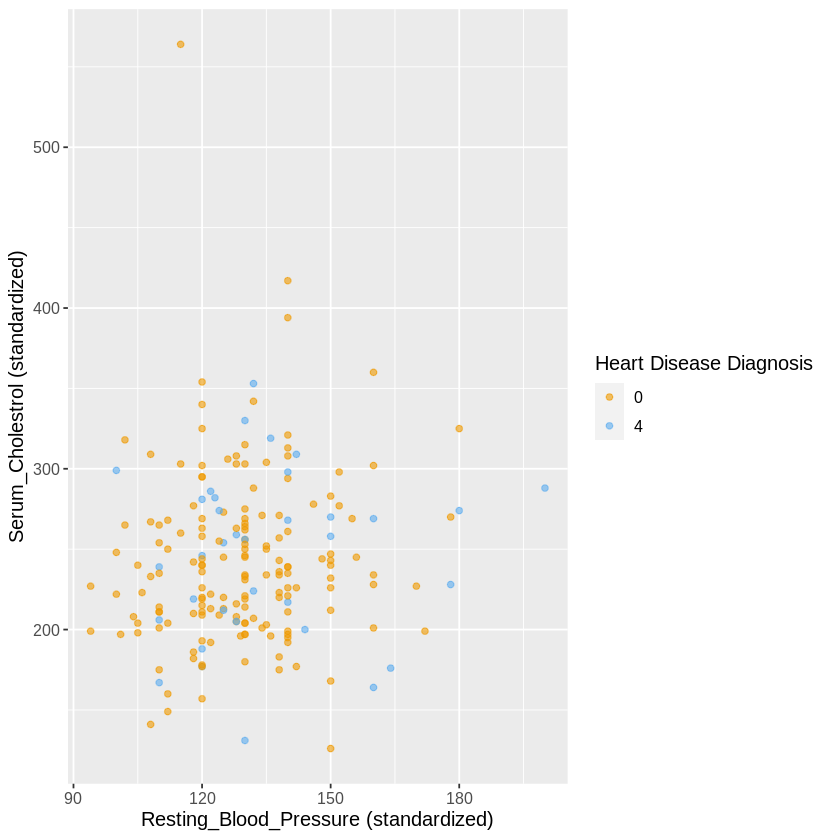

In [19]:
#BASED ON ONLY TWO VARIABLES (EX.Resting_Blood_Pressure AND Serum_Cholestrol)

graph  <- cleveland_heart_bruh |>
  ggplot(aes(x = Resting_Blood_Pressure, y = Serum_Cholestrol, color = Diagnosis_of_Heart_Disease)) +
  geom_point(alpha = 0.6) +
  labs(x = "Resting_Blood_Pressure (standardized)", 
       y = "Serum_Cholestrol (standardized)",
       color = "Heart Disease Diagnosis") +
  scale_color_manual(labels = c("0", "4"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))
graph 

## Split the data into training and testing data